In [1]:
from tensorflow.keras.optimizers import Adam

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/cleaned_data.csv')
df.head()

,Ship_Mode,Segment,City,State,Region,Category,Sub_Category,Sales,shipping_time
0,2,0,194,15,2,0,4,261.9600,92
1,2,0,194,15,2,0,5,731.9400,92
2,2,1,265,3,3,1,10,14.6200,173
3,3,0,153,8,2,0,16,957.5775,23
4,3,0,153,8,2,1,14,22.3680,23


In [5]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Ship_Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub_Category', 'shipping_time']]
y = df['Sales']

# Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
import joblib

# Save the fitted scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [9]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

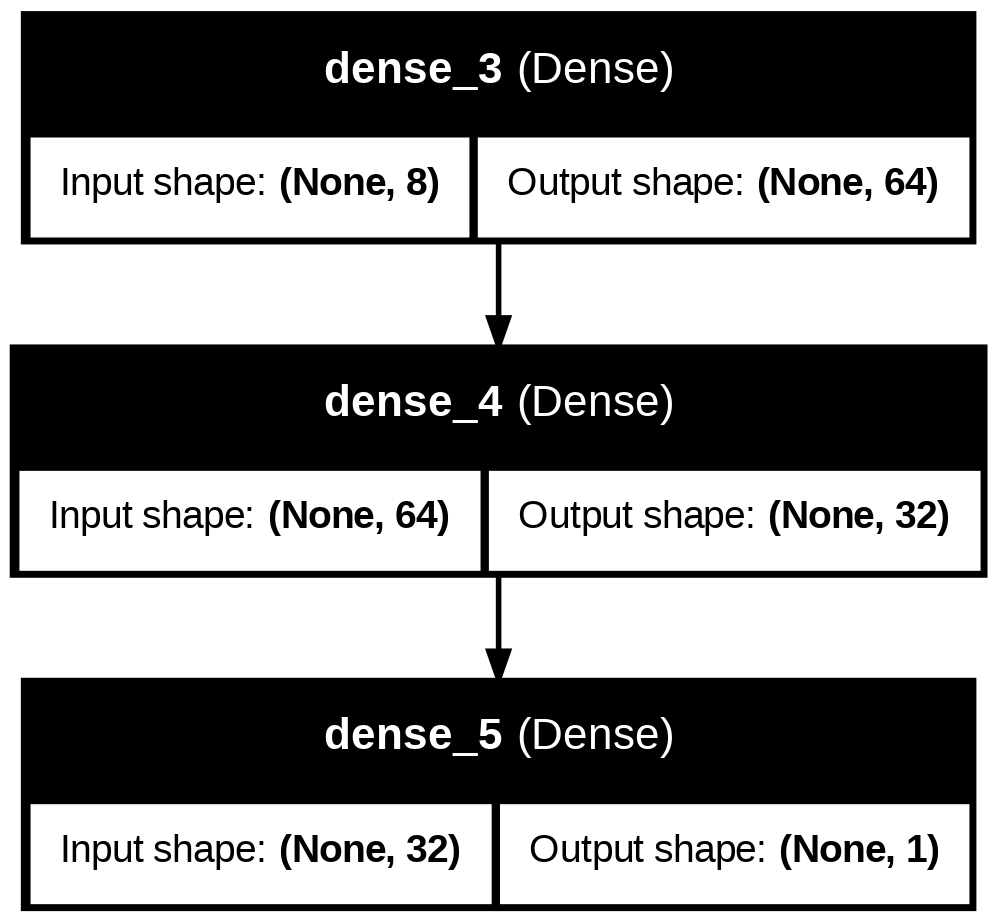

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation= 'linear')  # Output layer for regression (no activation)
])

# Compile the model
optimizer = Adam(learning_rate=0.0002)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Save the model plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=1000,
    batch_size=32,
    verbose=1
)


Epoch 1/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 337948.4688 - mae: 222.6695 - val_loss: 267421.9688 - val_mae: 207.6977
Epoch 2/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 371227.0312 - mae: 222.1834 - val_loss: 264585.0000 - val_mae: 201.6253
Epoch 3/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 346045.3750 - mae: 203.4383 - val_loss: 257443.3750 - val_mae: 192.1288
Epoch 4/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 497798.5312 - mae: 204.9400 - val_loss: 246405.2500 - val_mae: 188.4868
Epoch 5/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 291683.6875 - mae: 198.0009 - val_loss: 235476.2656 - val_mae: 195.4165
Epoch 6/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 349382.2812 - mae: 214.4882 - val_loss: 228685.1562 - val_mae: 209.0227
Epoch 7/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 358225.8438 - mae: 231.7717 - val_loss: 226212.8906 - val_mae: 221.6676
Epoch 8/1000
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


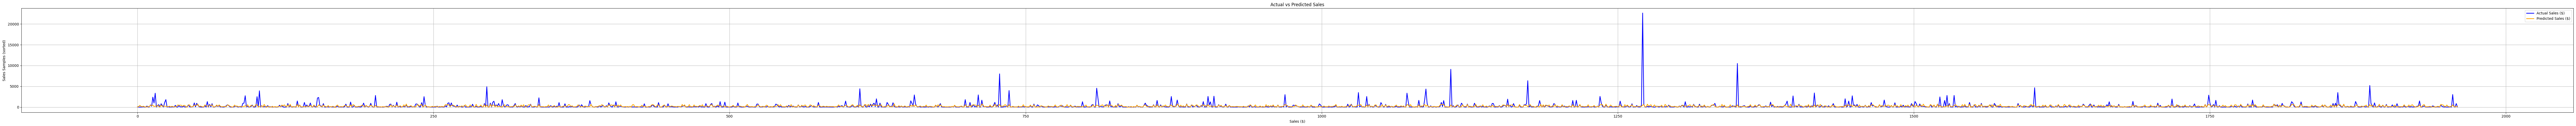

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Reset index
actual = y_test.reset_index(drop=True)
predicted = pd.Series(y_pred)

# Sort both for cleaner lines

# X-axis = Sorted index (representing sales rank or position)
# Sort both for cleaner lines
actual_sorted = actual.sort_values().reset_index(drop=True)
predicted_sorted = predicted.sort_values().reset_index(drop=True)

x = np.arange(len(actual_sorted))


# Plot
plt.figure(figsize=(100, 5))
plt.plot(x, actual, label='Actual Sales ($)', color='blue', linewidth=2)
plt.plot(x, predicted, label='Predicted Sales ($)', color='orange', linewidth=2)

plt.ylabel("Sales Samples (sorted)")
plt.xlabel("Sales ($)")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=500,
    batch_size=32,
    verbose=1
)


Epoch 1/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 275732.4688 - mae: 210.0588 - val_loss: 199865.7500 - val_mae: 201.1500
Epoch 2/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 207096.5938 - mae: 199.0174 - val_loss: 199962.1875 - val_mae: 201.6864
Epoch 3/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 312153.0312 - mae: 212.0278 - val_loss: 199987.3438 - val_mae: 202.2270
Epoch 4/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 281902.8750 - mae: 208.7984 - val_loss: 199911.8438 - val_mae: 201.5623
Epoch 5/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 194052.9375 - mae: 199.0836 - val_loss: 200046.5938 - val_mae: 202.5283
Epoch 6/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 272065.8750 - mae: 210.3737 - val_loss: 199840.5469 - val_mae: 200.4902
Epoch 7/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 254380.5469 - mae: 201.3745 - val_loss: 199972.3281 - val_mae: 202.0032
Epoch 8/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 400495.9

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(actual, predicted)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

# Calculate R² Score
r2 = r2_score(actual, predicted)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 255.40
Root Mean Squared Error (RMSE): 778.56
R² Score: 0.0931


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


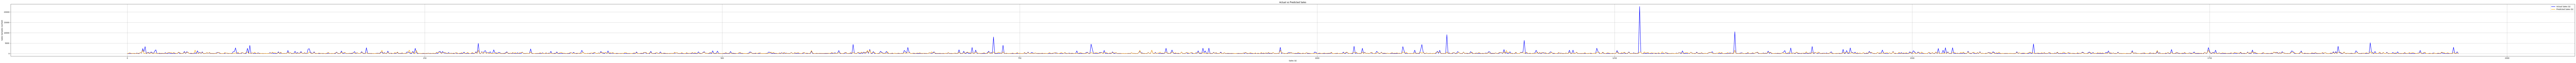

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Reset index
actual = y_test.reset_index(drop=True)
predicted = pd.Series(y_pred)

# Sort both for cleaner lines

# X-axis = Sorted index (representing sales rank or position)


# Plot
plt.figure(figsize=(200, 5))
plt.plot(x, actual, label='Actual Sales ($)', color='blue', linewidth=2)
plt.plot(x, predicted, label='Predicted Sales ($)', color='orange', linewidth=2)

plt.ylabel("Sales Samples (sorted)")
plt.xlabel("Sales ($)")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
optimizer = Adam(learning_rate=0.00001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=500,
    batch_size=32,
    verbose=1
)


Epoch 1/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 413879.5312 - mae: 222.4335 - val_loss: 268372.0938 - val_mae: 209.9703
Epoch 2/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 406267.9375 - mae: 234.4798 - val_loss: 268329.2188 - val_mae: 209.8689
Epoch 3/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 382610.8750 - mae: 225.9253 - val_loss: 268284.1250 - val_mae: 209.7622
Epoch 4/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 617484.0000 - mae: 237.0801 - val_loss: 268237.8438 - val_mae: 209.6523
Epoch 5/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 371791.3750 - mae: 222.9806 - val_loss: 268189.1250 - val_mae: 209.5362
Epoch 6/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 421073.8750 - mae: 221.4099 - val_loss: 268138.6875 - val_mae: 209.4157
Epoch 7/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 416159.8125 - mae: 237.3172 - val_loss: 268085.7188 - val_mae: 209.2893
Epoch 8/500
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 364980.0

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


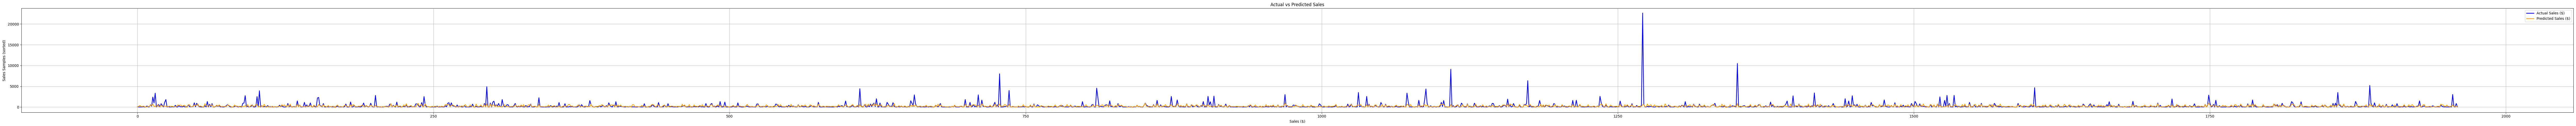

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Predict on test set
y_pred = model.predict(X_test_scaled).flatten()

# Reset index
actual = y_test.reset_index(drop=True)
predicted = pd.Series(y_pred)

# Sort both for cleaner lines
actual_sorted = actual.sort_values().reset_index(drop=True)
predicted_sorted = predicted.sort_values().reset_index(drop=True)

# X-axis = Sorted index (representing sales rank or position)
x = np.arange(len(actual_sorted))


# Plot
plt.figure(figsize=(100, 5))
plt.plot(x, actual, label='Actual Sales ($)', color='blue', linewidth=2)
plt.plot(x, predicted, label='Predicted Sales ($)', color='orange', linewidth=2)

plt.ylabel("Sales Samples (sorted)")
plt.xlabel("Sales ($)")
plt.title("Actual vs Predicted Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate MAE
mae = mean_absolute_error(actual, predicted)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

# Calculate R² Score
r2 = r2_score(actual, predicted)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 255.40
Root Mean Squared Error (RMSE): 778.56
R² Score: 0.0931


In [ ]:
optimizer = Adam(learning_rate=0.000001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])


history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,  # 20% of training data used for validation
    epochs=200,
    batch_size=32,
    verbose=1
)


Epoch 1/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 305309.7188 - mae: 208.9303 - val_loss: 200580.0156 - val_mae: 199.6674
Epoch 2/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 286829.6250 - mae: 208.0109 - val_loss: 200581.3125 - val_mae: 199.6793
Epoch 3/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 447464.8750 - mae: 221.3583 - val_loss: 200582.3281 - val_mae: 199.6923
Epoch 4/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 273633.9375 - mae: 211.9666 - val_loss: 200582.2656 - val_mae: 199.6932
Epoch 5/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 385513.5312 - mae: 220.6891 - val_loss: 200583.5781 - val_mae: 199.7086
Epoch 6/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 268320.0938 - mae: 202.0993 - val_loss: 200583.6562 - val_mae: 199.7091
Epoch 7/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 220832.2500 - mae: 198.6850 - val_loss: 200583.5938 - val_mae: 199.7070
Epoch 8/200
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 369128.5

In [13]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#import numpy as np

# Calculate MAE
mae = mean_absolute_error(actual, predicted)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(actual, predicted))

# Calculate R² Score
r2 = r2_score(actual, predicted)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")




Mean Absolute Error (MAE): 211.40
Root Mean Squared Error (RMSE): 456.13
R² Score: 0.47


In [ ]:
import pickle

# Save the trained model as a .pkl file
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

print("Model saved as model.pkl")


Model saved as model.pkl


In [ ]:
model.save("model.h5")
print("Model saved to model.h5")


Model saved to model.h5


In [12]:
# Plot training & validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Training vs Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'history' is not defined

<Figure size 1000x600 with 0 Axes>